In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
def imshow(title="", image=None, size=10):
    h, w = image.shape[0], image.shape[1]
    aspect_ratio = w / h

    plt.figure(figsize=(size * aspect_ratio, size))

    # Check if the image is grayscale
    if len(image.shape) == 2:  # Grayscale images have only 2 dimensions
        plt.imshow(image, cmap="gray")  # Use the 'gray' colormap for grayscale images
    else:
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))  # Convert color images to RGB

    plt.title(title)
    plt.axis('off')  # Optional: Remove axis
    plt.show()

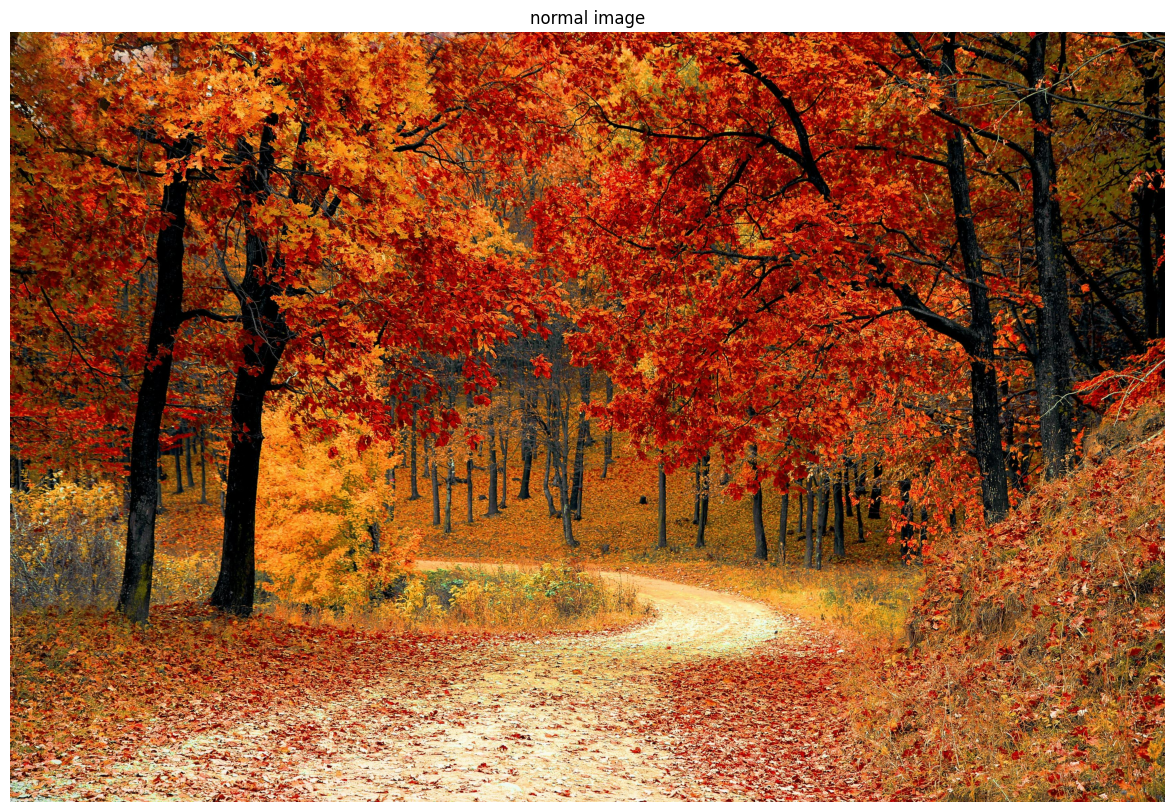

In [102]:
image_path='/content/drive/MyDrive/MyDataSet/Class1/nature1.jpg'

image=cv.imread(image_path)
imshow("normal image",image)


In [103]:
# In this lesson we'll learn:
# Using findContours
# Drawing Contours
# Hierachy of Contours
# Contouring Modes (Simple vs Approx)

In [104]:
# What are Contours?

# Contours are continous lines or curves that bound or cover the full boundary of an object.

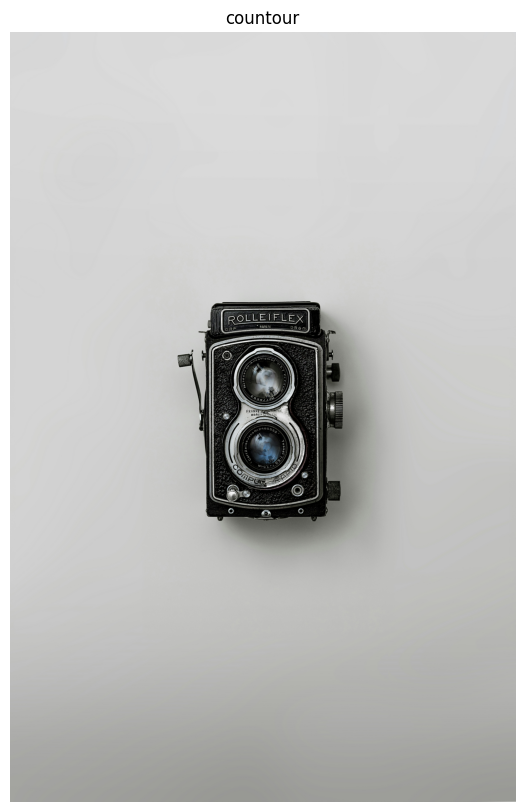

In [105]:

image_path='/content/drive/MyDrive/MyDataSet/SCLASS/cntr.jpg'

image=cv.imread(image_path)
imshow("countour",image)

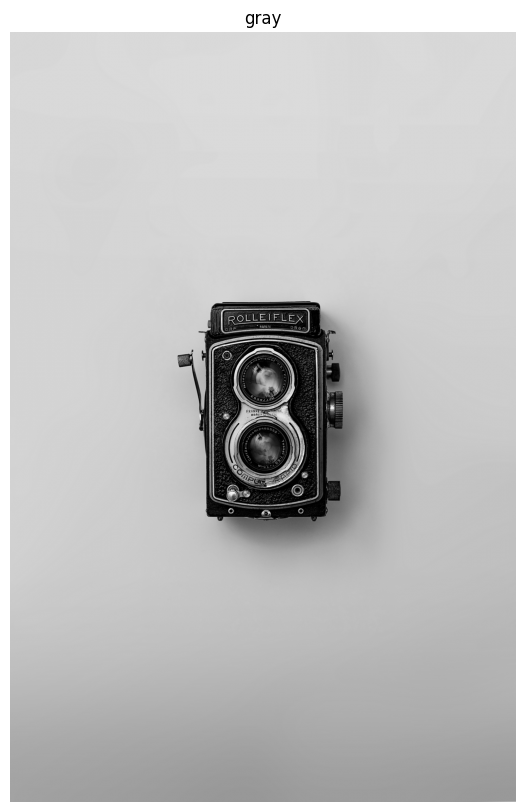

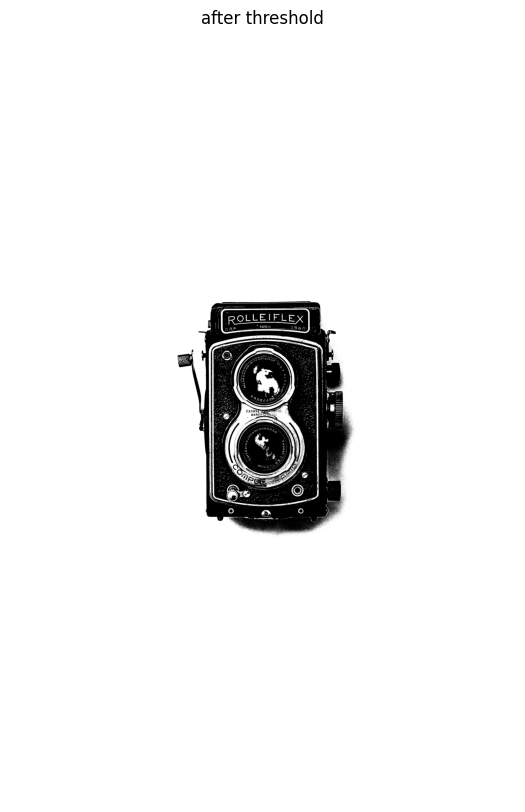

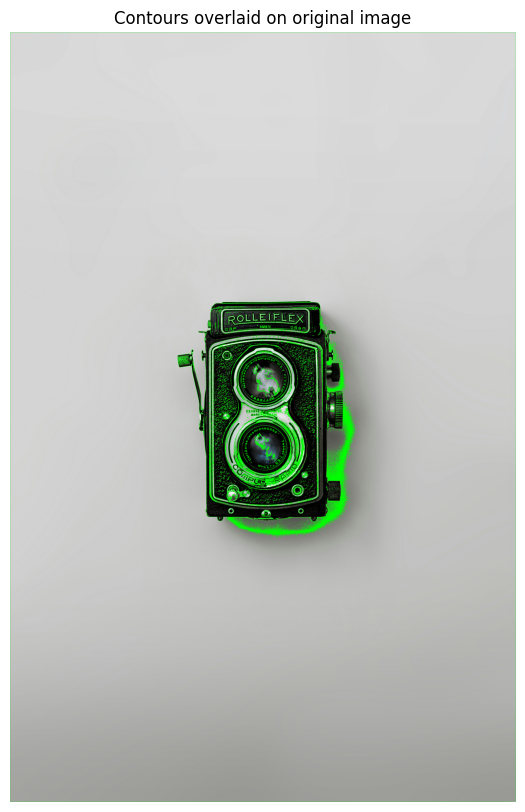

Number of Contours found = 33626


In [106]:
# Applying cv2.findContours()


#conver the image to gray scale
image=cv.imread(image_path)
gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)

imshow("gray",gray)


_,th2=cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
imshow("after threshold",th2)



# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv.findContours(th2, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all


cv.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))

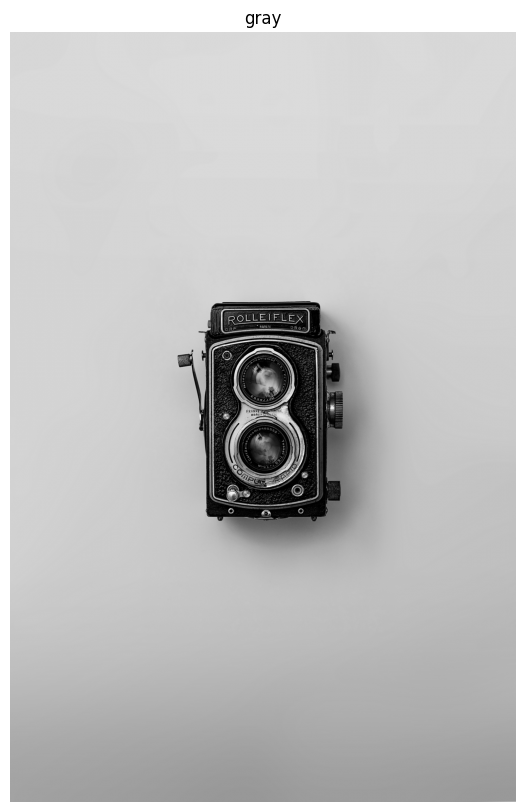

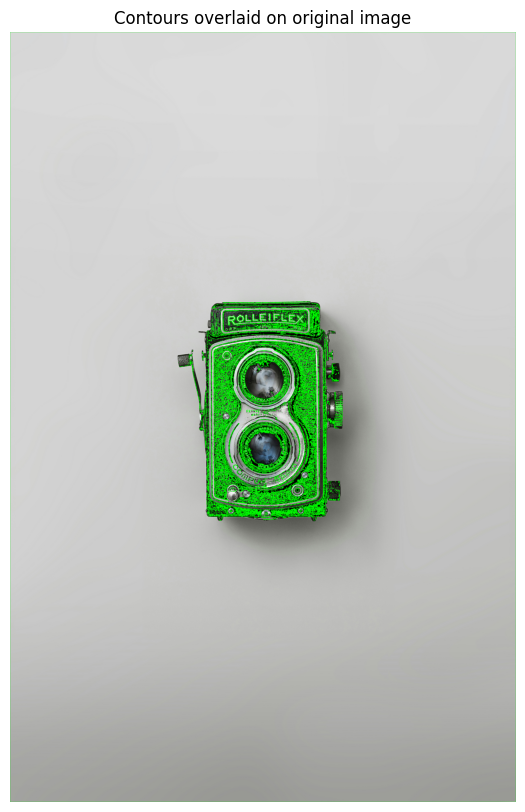

Number of Contours found = 59555


In [107]:
# Applying cv2.findContours()
image=cv.imread(image_path)

#conver the image to gray scale

gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)

imshow("gray",gray)


# _,th2=cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# imshow("after threshold",th2)

# dont apply threshold to find contours

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv.findContours(gray, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all


cv.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))

In [108]:
# NOTE: For findContours to work, the background has to be black and foreground (i.e. the text or objects)

In [109]:
# We can use Canny Edges instead of Thresholding

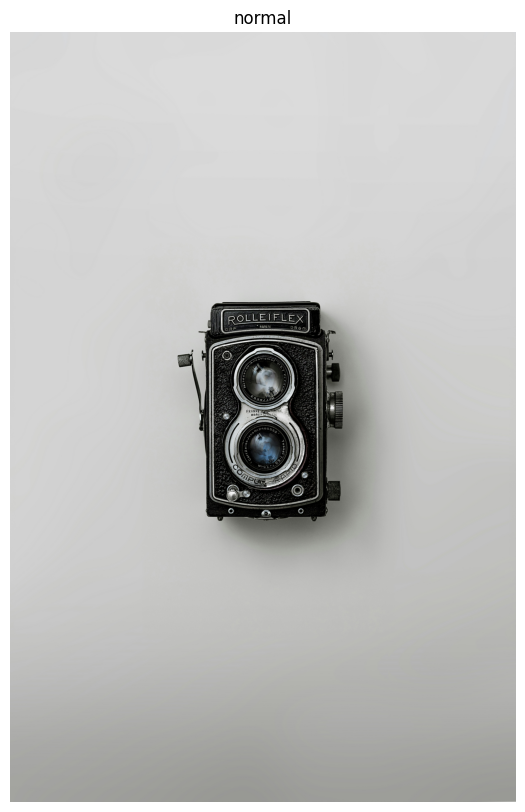

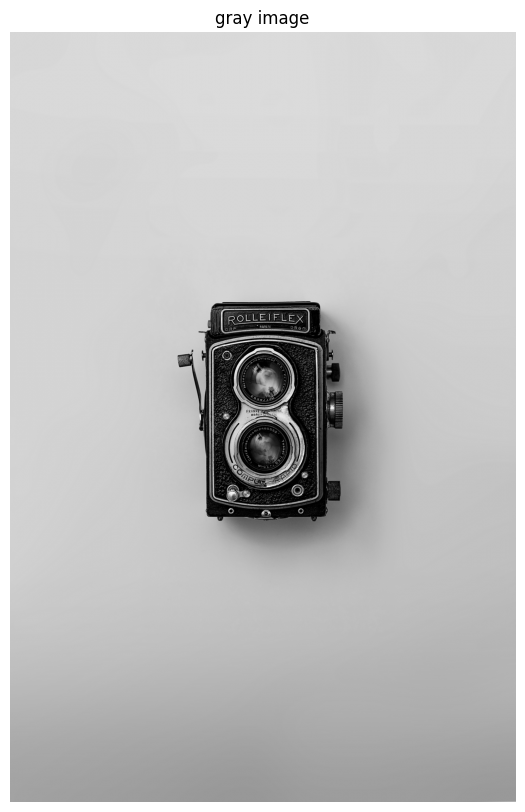

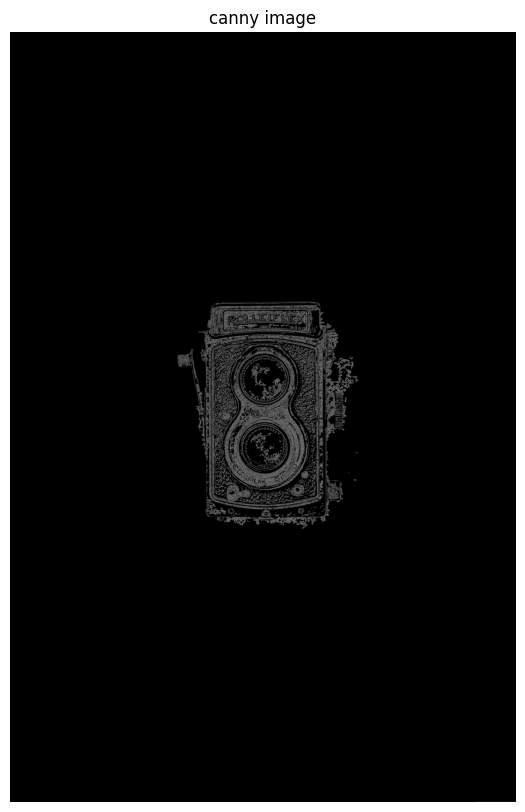

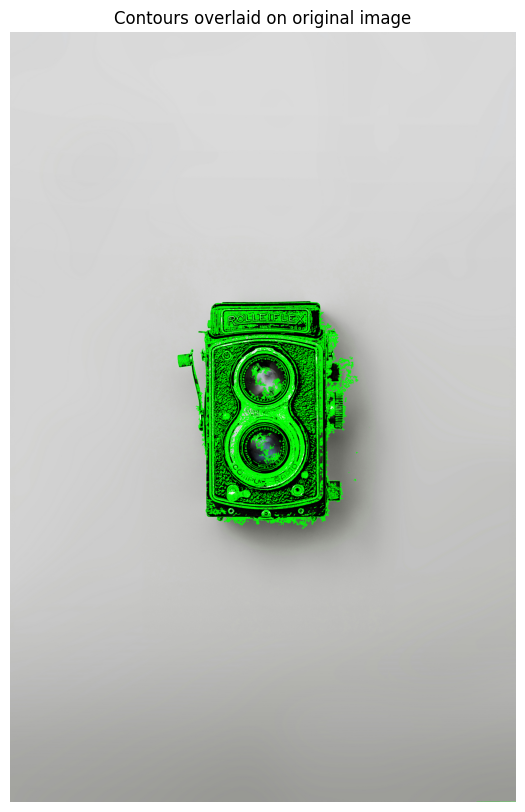

Number of Contours found = 38801


In [110]:
image=cv.imread(image_path)

imshow("normal",image)

gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
imshow("gray image",gray)

edged=cv.Canny(gray,30,200)
imshow("canny image",edged)


# Finding Contours
contours, hierarchy = cv.findContours(edged, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))



In [111]:
# Remember these Countouring Steps
# Grayscale
# Threshold or Canny Edge Detection to Binarize image
# Note: Blurring before Step 2 is recommended to remove noisy contours

In [112]:
# Retreival Modes


# Hierachry

# This array stores 4 values for each contour:

# First term is the index of the Next contour
# Second term is the index of the Previous contour
# Third term is the index of the parent contour
# Forth term is the index of the child contour